In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline  




In [2]:
img = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')  
img.shape

(225, 225, 3)

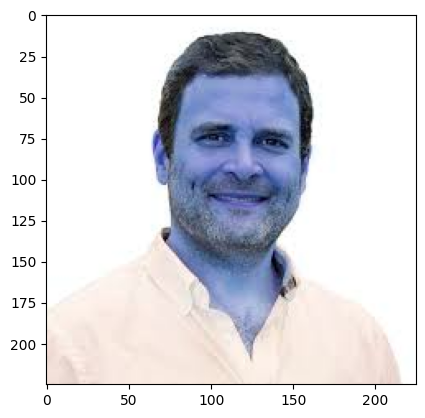

In [3]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 68,  36, 103, 103]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(68, 36, 103, 103)

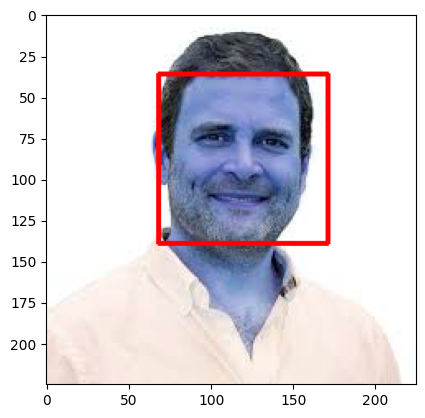

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

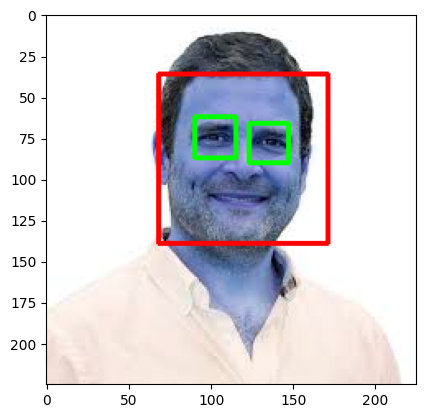

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

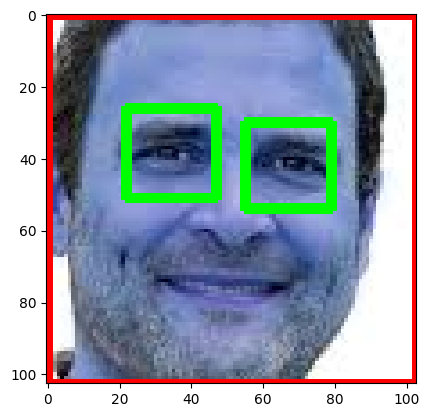

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
cropped_img = np.array(roi_color)
cropped_img.shape

(103, 103, 3)

In [12]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

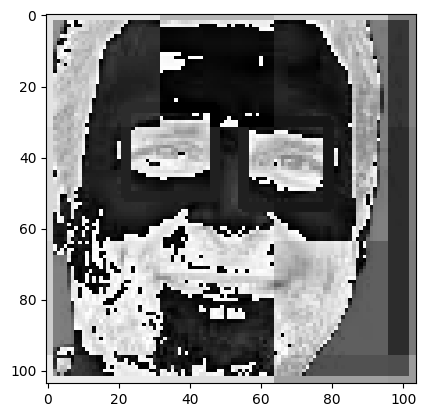

In [13]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

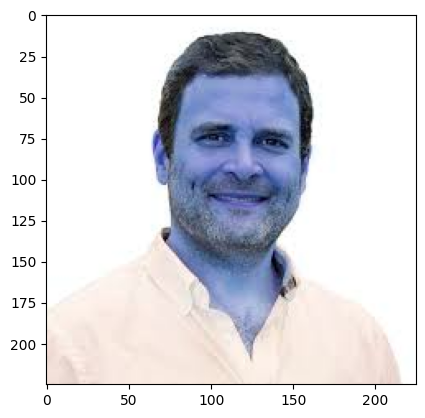

In [15]:
original_image = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')
plt.imshow(original_image)

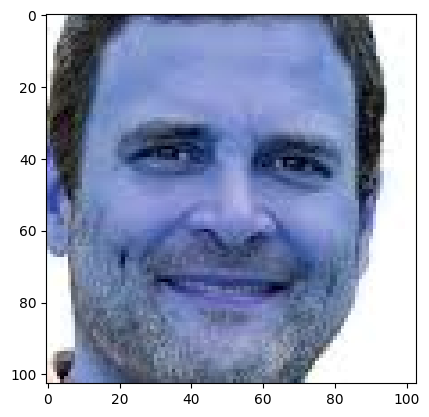

In [16]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image1.jpg')
plt.imshow(cropped_image)

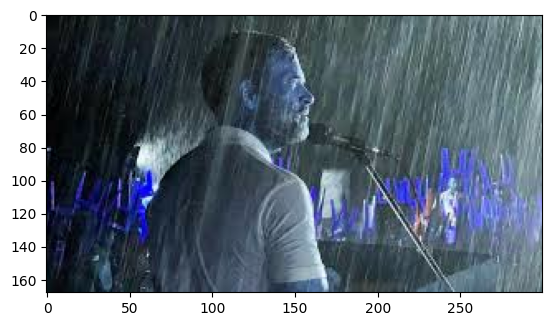

In [17]:
org_image_obstructed = cv2.imread(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image2.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'C:\Users\ssnar\OneDrive\Desktop\Project\CelebrityFaceRecognition\model\test_images\image2.jpg')
cropped_image_no_2_eyes

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs


['./dataset/Kiara_Advani',
 './dataset/Shraddha_Kapoor',
 './dataset/Tamannaah_Bhatia',
 './dataset/Varun_Dhawan',
 './dataset/Vicky_Kaushal']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:


# Rest of your code remains the same
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        # Optional: Skip non-image files if needed
        if not entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
            
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
                
            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Kiara_Advani
Generating cropped images in folder: ./dataset/cropped/Kiara_Advani
Shraddha_Kapoor
Generating cropped images in folder: ./dataset/cropped/Shraddha_Kapoor
Tamannaah_Bhatia
Generating cropped images in folder: ./dataset/cropped/Tamannaah_Bhatia
Varun_Dhawan
Generating cropped images in folder: ./dataset/cropped/Varun_Dhawan
Vicky_Kaushal
Generating cropped images in folder: ./dataset/cropped/Vicky_Kaushal


In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Kiara_Advani': 0,
 'Shraddha_Kapoor': 1,
 'Tamannaah_Bhatia': 2,
 'Varun_Dhawan': 3,
 'Vicky_Kaushal': 4}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:  # Check if image loaded successfully
            print(f"Error loading image: {training_image}. Skipping.")
            continue  # Skip to the next image
        
        # Proceed with processing if the image is valid
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [26]:
len(X[0])

4096

In [27]:
X[0]


array([[ 25],
       [ 31],
       [ 50],
       ...,
       [245],
       [174],
       [240]], dtype=uint8)

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(790, 4096)

In [29]:
y[0]

0

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9191919191919192

In [32]:
len(X_test)

198

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.98      0.92        44
           1       0.88      0.88      0.88        40
           2       1.00      0.76      0.86        37
           3       0.89      1.00      0.94        40
           4       1.00      0.97      0.99        37

    accuracy                           0.92       198
   macro avg       0.93      0.92      0.92       198
weighted avg       0.93      0.92      0.92       198



In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\ssnar\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ssnar\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ssnar\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ssnar\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWar

,model,best_score,best_params
0,svm,0.875004,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.726364,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871671,{'logisticregression__C': 1}


In [39]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)


0.9292929292929293

In [41]:
best_estimators['random_forest'].score(X_test,y_test)


0.8232323232323232

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.9343434343434344

In [43]:
best_clf = best_estimators['logistic_regression']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[42,  1,  1,  0,  0],
       [ 0, 38,  0,  2,  0],
       [ 2,  4, 30,  1,  0],
       [ 0,  0,  0, 38,  2],
       [ 0,  0,  0,  0, 37]], dtype=int64)

In [47]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))